# Import/Explore Data

In [ ]:
# Import necessary modules
import pandas as pd
import numpy as np
import umap as umap
import matplotlib.pyplot as plt
import seaborn as sns
import os


print(os.getcwd())

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read in data
filepath = '/content/drive/MyDrive/marketing_campaign.csv'
df = pd.read_csv(filepath, sep="\t")
df.drop(columns=['Dt_Customer'], inplace=True) # Unnecessary column dropped

# Ensure data is read in correctly
print(df.head(5))

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

   Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  AcceptedCmp3  \
0       58       635         88  ...                  7             0   
1       38        11          1  ...                  5             0   
2       26       426         49  ...                  4             0   
3       26        11          4  ...                  6             0   
4       94       173         43  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0      

# Agglomerative Clustering

## One-Hot Encoding

In [ ]:
# Inspect data types
dtype_counts = df.dtypes.reset_index()
dtype_counts.columns = ['column', 'dtype']

# Identify integer and string columns
int_cols = df.select_dtypes(include=['int64']).columns.tolist()
obj_cols = df.select_dtypes(include=['object']).columns.tolist()

# Detect ID column if present
id_col = 'ID' if 'ID' in df.columns else None

# One‑hot encode all string (object) columns
df_one = pd.get_dummies(df, columns=obj_cols)

# Convert boolean values in one-hot encoded columns to int (0/1)
for col in df_one.columns:
    if df_one[col].dtype == bool:
      df_one[col] = df_one[col].astype(int)

# print(f"ID column: {id_col}")
# print(f"Integer columns count: {len(int_cols)}")
# print(f"String columns count: {len(obj_cols)}")
# print(f"Original shape: {df.shape}")
# print(f"New shape: {df_one.shape}")

# Removing unnecessary columns
df_one.drop(columns=['Education_2n Cycle', 'Marital_Status_Absurd',
                     'Marital_Status_YOLO', 'Marital_Status_Alone',
                     'Marital_Status_Together', 'ID'], inplace=True)


In [ ]:
df_one

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_Revenue,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,1957,58138.0,0,0,58,635,88,546,172,88,...,11,1,0,1,0,0,0,0,1,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,11,0,0,1,0,0,0,0,1,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,11,0,0,1,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,11,0,0,1,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,11,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,11,0,0,1,0,0,0,1,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,11,0,0,0,0,1,0,0,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,11,0,0,1,0,0,1,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,11,0,0,0,1,0,0,0,0,0


In [ ]:
print(df_one.dtypes)

Year_Birth                   int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Complain                     int64
Z_CostContact                int64
Z_Revenue                    int64
Response                     int64
Education_Basic              int64
Education_Graduation         int64
Education_Master             int64
Education_PhD       

In [ ]:
# Save the file
df_one.to_csv('/content/drive/MyDrive/marketing_campaign_dos.csv', index=False)

## Distance Matrix + Dendrogram

[[    0.    11825.004 13483.617 31503.356   670.486]
 [11825.004     0.    25273.019 19698.034 11950.973]
 [13483.617 25273.019     0.    44969.202 13322.779]
 [31503.356 19698.034 44969.202     0.    31647.695]
 [  670.486 11950.973 13322.779 31647.695     0.   ]]


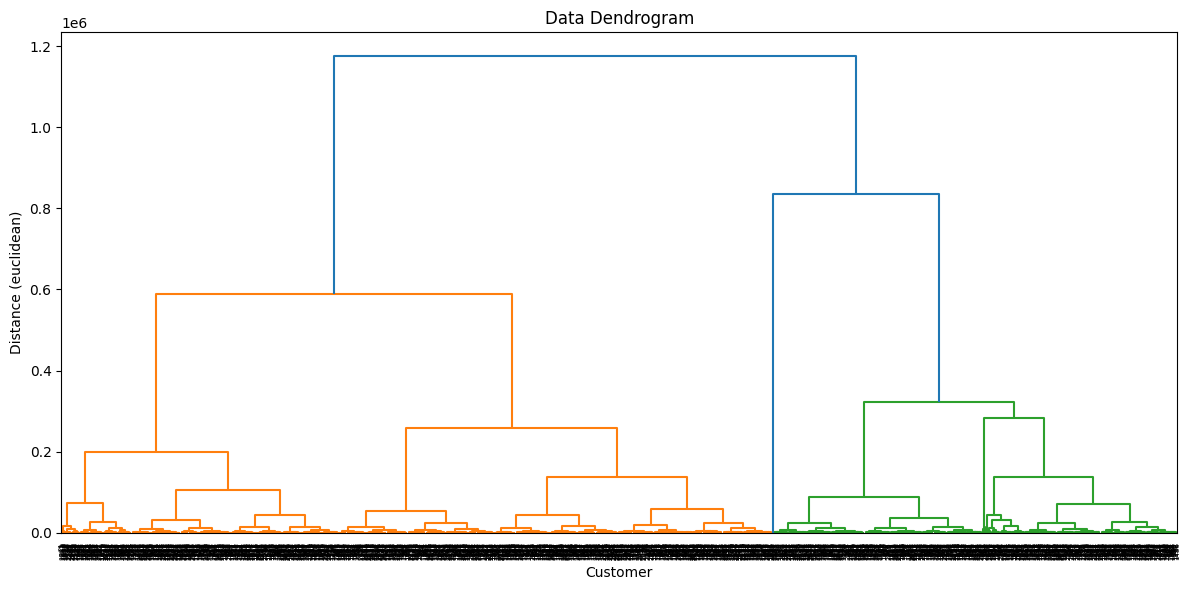

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

df_one = pd.read_csv('/content/drive/MyDrive/marketing_campaign_dos.csv')
df_one['Income'] = df_one['Income'].fillna(df_one['Income'].mean())

# Calculate pairwise distances
distances = pdist(df_one.values, metric='euclidean') # Euclidean distance used
dist_matrix = squareform(distances)

dist_df = pd.DataFrame(dist_matrix,
                       index=df_one.index,
                       columns=df_one.index)

np.set_printoptions(precision=3, edgeitems=5, linewidth=100)
print(dist_matrix[:5, :5])

# dist_df.to_csv('/content/drive/MyDrive/dist_matrix.csv', index=True)

#created dendrogram in order to pick n_clusters

'''linkage used for this data set is ward's, based on readings about linkage types'''

clustering_link = linkage(distances, method='ward')
plt.figure(figsize=(12,6))
dendrogram(clustering_link, leaf_rotation=90)
plt.title('Data Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Distance (euclidean)')
plt.tight_layout()
plt.show()


## Clustering

In [ ]:
#standarized the data since we have both numerical and categorical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(df_one)

In [ ]:
#applying agglomerative clustering
#article from scikit learn was used as a reference for this step: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.cluster import AgglomerativeClustering
#n_clusters based on dendrogram
clustering_customer = AgglomerativeClustering(n_clusters=3, linkage='ward')
clustering_customer.fit(data_std)

df_one['Assigned_Cluster'] = clustering_customer.labels_


In [ ]:
#here we print what clusters a customer belongs to (only 20 records for a quick peek)
print(df_one[['Assigned_Cluster']].head(20))
#to get an overall picture, we also print total #of customers assigned to each cluster
print(df_one['Assigned_Cluster'].value_counts())

    Assigned_Cluster
0                  0
1                  1
2                  2
3                  1
4                  1
5                  0
6                  1
7                  1
8                  1
9                  2
10                 1
11                 1
12                 0
13                 1
14                 1
15                 0
16                 1
17                 2
18                 0
19                 1
Assigned_Cluster
1    1039
0     652
2     549
Name: count, dtype: int64


In [ ]:
#The interesting part! Cluster information
#here we add the cluster labels to df_one as a new column
df_one['Assigned_Clusters'] = clustering_customer.labels_

'''then we group all customers assigned to the same cluster
and take the mean of all properties/columns, for a overview'''

cluster_info = df_one.groupby('Assigned_Clusters').mean().round(2)

print("Cluster Information:")
print(cluster_info)

Cluster Information:
                   Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  \
Assigned_Clusters                                                               
0                     1968.86  74366.63     0.07      0.31    49.73    592.73   
1                     1970.82  37217.14     0.74      0.49    49.57     72.48   
2                     1964.93  54422.95     0.32      0.76    47.49    399.00   

                   MntFruits  MntMeatProducts  MntFishProducts  \
Assigned_Clusters                                                
0                      62.11           405.51            88.54   
1                       6.51            33.76             8.95   
2                      21.24           135.70            31.02   

                   MntSweetProducts  ...  Response  Education_Basic  \
Assigned_Clusters                    ...                              
0                             63.21  ...      0.25             0.00   
1                            

Having a cluster summary helps us interpret the 3 groups we've established by looking at some of the properties such as income, the amount spent on certain products, response rate etc.

 **When looking at the cluster information we can see that:**

Cluster 0:
1. Has the highest Income (~$74,000)
2. Highest amount spent across products
3. Highest response rate

Cluster 1:
1. Has the lowest income (~$37,000)
2. Lowest amount spent across all products
3. Lowest response rate

Cluster 2:
1. In the middle range when it comes to income (~$54,000)
2. Spending across all products is higher than cluster 1, but lower than cluster 0
3. Response rate is moderate  









## Visuals

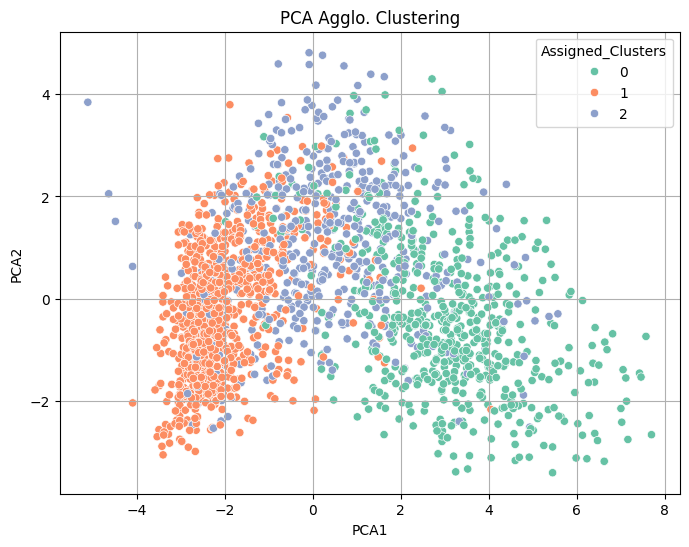

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_std)

df_visual= pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_visual['Assigned_Clusters'] = clustering_customer.labels_

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Assigned_Clusters', data=df_visual, palette='Set2')
plt.title('PCA Agglo. Clustering')
plt.grid(True)
plt.show()



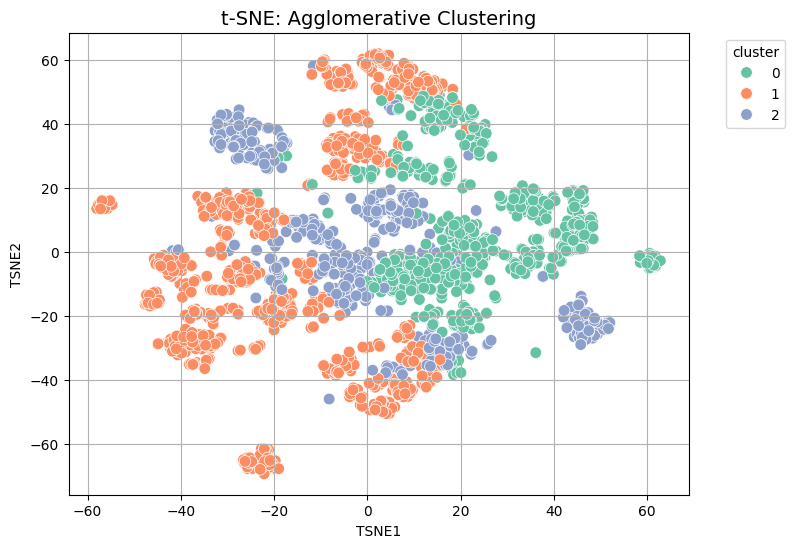

In [ ]:
#t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_components = tsne.fit_transform(data_std)

df_visual_tsne= pd.DataFrame(tsne_components, columns=['TSNE1', 'TSNE2'])
df_visual_tsne['Assigned_Clusters'] = clustering_customer.labels_

plt.figure(figsize=(8,6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Assigned_Clusters', data=df_visual_tsne, palette='Set2'
,s=70, edgecolor='white', linewidth=0.5)
plt.title('t-SNE: Agglomerative Clustering', fontsize=14)
plt.legend(title='cluster', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


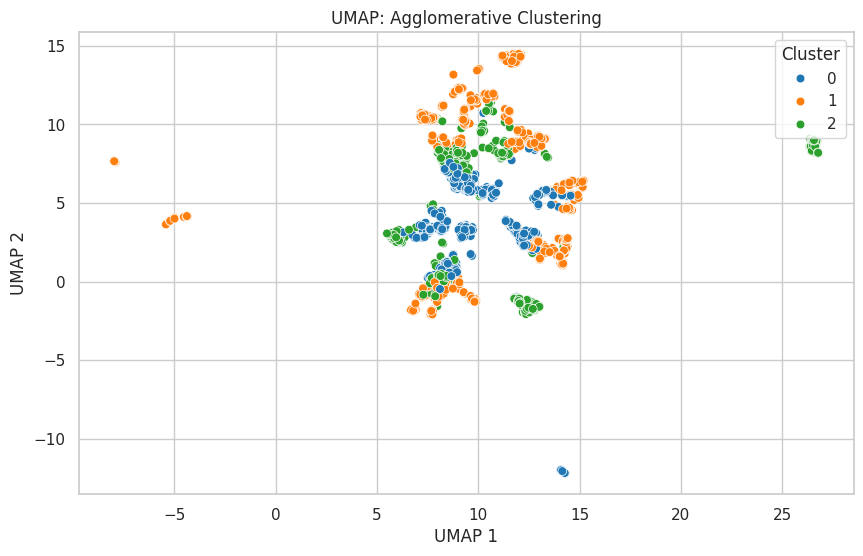

In [ ]:
umap_mdl = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_mdl.fit_transform(data_std)

umap_df = pd.DataFrame({
      'UMAP 1': umap_result[:,0],
      'UMAP 2': umap_result[:,1],
      'Assigned_Clusters': df_one['Assigned_Clusters']
})

sns.set(style='whitegrid', rc={'figure.figsize':(10,6)})
sns.scatterplot(data=umap_df, x='UMAP 1', y='UMAP 2', hue='Assigned_Clusters', palette='tab10', s=40)
plt.title('UMAP: Agglomerative Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Cluster')
plt.show()

  # Data Visualizations

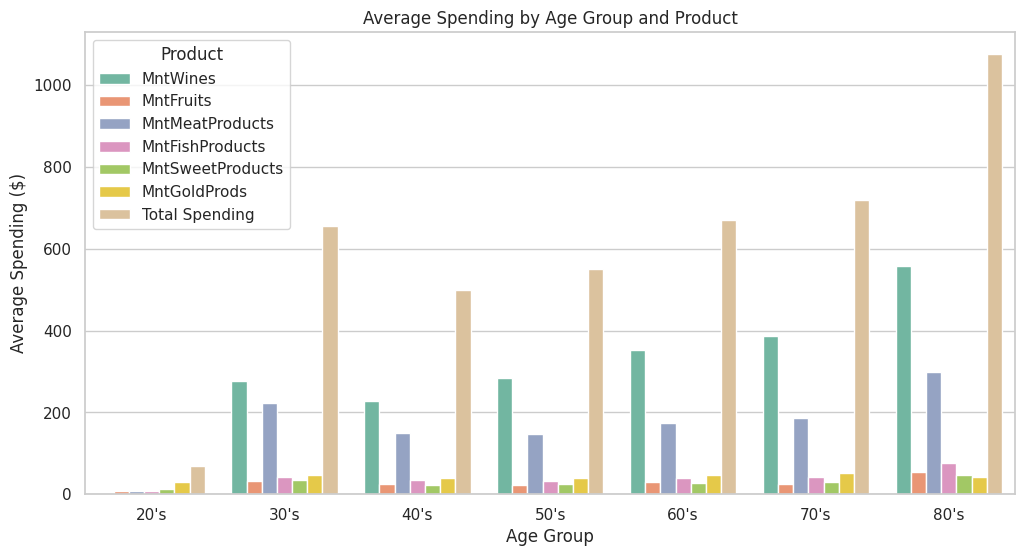

In [ ]:
#change visual qualities
sns.set_style('whitegrid')
sns.set_palette("Set2")


#calculate age from year of birth, adding new attribute to df
df["Age"] = 2025 - df['Year_Birth']
#remove people aged 100 or older (few birthdays in the 1800's, e.g.)
df = df[df["Age"] < 100].copy()
#define bins for age groups using pd.cut. Resource for this will be cited in submission (pandas docs)
#upper limits (no one in their 90's in dataset)
#starts at 20
bins = [20, 30, 40, 50, 60, 70, 80, 90]
#add labels for graph
labels = ["20's", "30's", "40's", "50's", "60's", "70's", "80's"]
#assign age groups
#works by binning "Age" based on bins, setting labels equal to the aboove labels list
#right=False excludes the upper limits of the bins
df["Age Group"] = pd.cut(df["Age"].astype(int), bins, labels=labels, right=False).astype("category")

#calculate total spending by adding amounts spent on each product
df.loc[:, "Total Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
#calculate the mean spending by age group. Resource for this will be cited in submission (pandas docs)
#"groups" amounts spent on each product "by" age group
#aggregates mean onto each attribute
avg_spending = df.groupby(["Age Group"], observed=False).agg({
                          "MntWines": "mean",
                          "MntFruits": "mean",
                          "MntMeatProducts": "mean",
                          "MntFishProducts": "mean",
                          "MntSweetProducts": "mean",
                          "MntGoldProds": "mean",
                          "Total Spending": "mean"
#flattens data onto df
}).reset_index()
#melt the DataFrame for easy plotting
#this was an interesting function that took me a bit to wrap my head around, but it's very useful. it's not something I would've expected to have a function for
#found using GPT query, will cite in readme
avg_spending_melted = avg_spending.melt(id_vars="Age Group",
                                        #melt product amounts into one "product" column
                                         value_vars=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "Total Spending"],
                                         var_name="Product",
                                         #name of new column for value_vars
                                         value_name="Average Spending")

#set figure size
plt.figure(figsize=(12, 6))
#barplot using age, average spending, and colored by product
sns.barplot(data=avg_spending_melted, x="Age Group", y="Average Spending", hue="Product")
#label axes/graph
plt.xlabel("Age Group")
plt.ylabel("Average Spending ($)")
plt.title("Average Spending by Age Group and Product")
#display graph
plt.show()

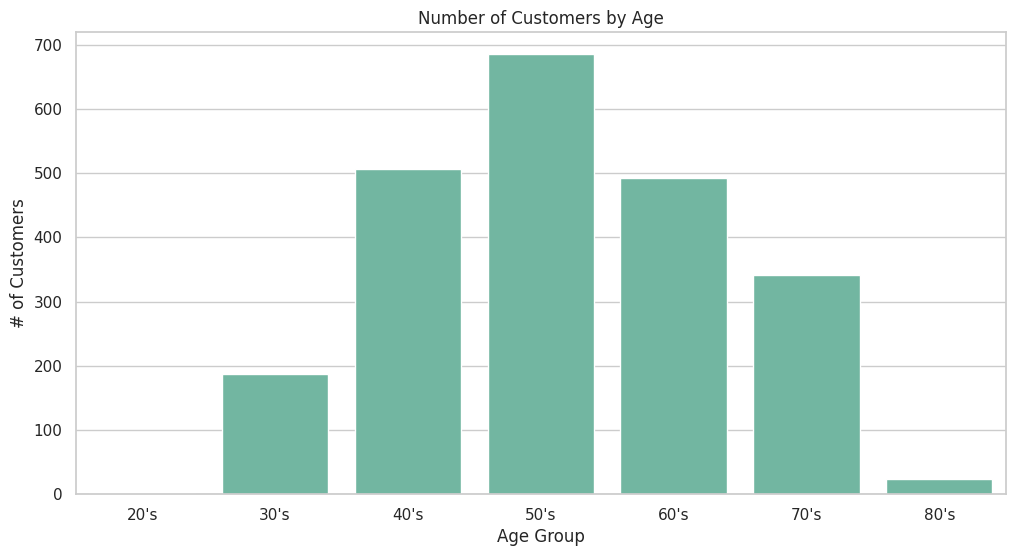

In [ ]:
#this is copied from avg_spending_by_age_group_product, documentation is the same just with different labels
df["Age"] = 2025 - df['Year_Birth']
df = df[df["Age"] < 100].copy()
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ["20's", "30's", "40's", "50's", "60's", "70's", "80's"]
df["Age Group"] = pd.cut(df["Age"].astype(int), bins=bins, labels=labels, right=False).astype("category")

#size counts the number of rows, grouping by age
#was running into an error where customer_couint was getting passed as a list, and discovered that I needed to use reset_index
#resets the index of a df
customer_count = df.groupby(["Age Group"],observed=False).size().reset_index(name="customer_count")

plt.figure(figsize=(12, 6))
#barplot using age, and a count of customers
sns.barplot(data=customer_count, x="Age Group", y="customer_count")
#label axes/graph
plt.xlabel("Age Group")
plt.ylabel("# of Customers")
plt.title("Number of Customers by Age")
#display graph
plt.show()